In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('INASTI.Stats..csv', sep=';')
df

,Entité administrative,Nombre d'indépendants,Hommes,Femmes,15-24 ans,25-49 ans,50-64 ans,65 ans et plus,Moins de 30 ans,55 ans et +,Indépendants (aidants non compris),Aidants,Actifs à titre principal,Actifs à titre complémentaire,Actifs après la pension,Annee
0,Nivelles,46639,30421,16218,1010,24488,16532,4609,3969,14495,45006,1633,31744,10003,4892,2016
1,Ath,7773,4852,2921,218,4235,2588,732,702,2264,7171,602,5076,1941,756,2016
2,Charleroi,26306,16945,9361,866,14967,8160,2313,3070,7260,24767,1539,16751,7074,2481,2016
3,Mons,16176,9905,6271,411,9310,5016,1439,1708,4511,15183,993,10131,4509,1536,2016
4,Mouscron,4521,2790,1731,127,2489,1485,420,406,1289,4067,454,3192,894,435,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Neufchâteau,5830,4420,1410,177,3624,1448,581,679,1369,5511,319,3844,1356,630,2000
336,Virton,3260,2365,895,87,2028,815,330,305,726,3103,157,2225,671,364,2000
337,Dinant,8916,6508,2408,280,5555,2266,815,999,2030,8475,441,6374,1650,892,2000
338,Namur,20011,14218,5793,561,12949,5244,1257,2288,3903,19316,695,14259,4333,1418,2000


In [54]:
pivot = df[["Entité administrative", "Nombre d'indépendants", "Annee"]].pivot(
    index="Annee",
    columns="Entité administrative",
    values="Nombre d'indépendants"
).sort_index()
pivot.head()

Entité administrative,Arlon,Ath,Bastogne,Charleroi,Dinant,Huy,Liège,Marche-en-Famenne,Mons,Mouscron,Namur,Neufchâteau,Nivelles,Philippeville,Soignies,Thuin,Tournai,Verviers,Virton,Waremme
Annee,,,,,,,,,,,,,,,,,,,,
2000,2555,5842,4515,21545,8916,7508,35978,4975,13387,4161,20011,5830,32681,4825,10656,10008,9773,21676,3260,5407
2001,2508,5802,4473,21311,8829,7499,35471,4923,13370,4112,20061,5768,32737,4791,10542,9953,9651,21459,3226,5429
2002,2459,5764,4436,21025,8803,7473,35214,4917,13134,4039,20218,5786,33075,4809,10594,9871,9621,21236,3179,5380
2003,2630,6298,4824,22415,9567,8028,37115,5331,14128,4466,21679,6217,34907,5132,11509,10673,10645,22812,3409,5747
2004,2572,6252,4733,22392,9545,8100,36919,5374,14115,4437,21726,6209,35570,5127,11542,10673,10587,22749,3349,5784


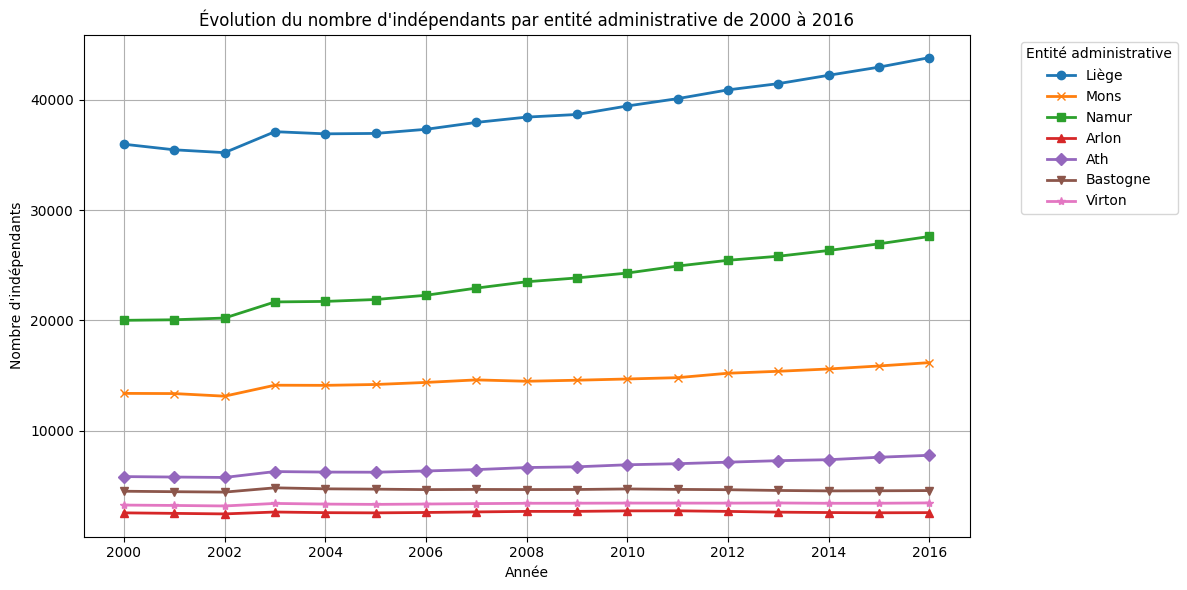

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# On fixe à 7 le nombre d'entités pour un graphique moins surchargé
entites = ["Liège", "Mons", "Namur", "Arlon", "Ath", "Bastogne", "Virton"]
markers = ["o", "x", "s", "^", "D", "v", "*"]

# palette de couleur adaptée aux daltoniens
colors = plt.cm.tab10(range(len(entites)))

for entite, marker, color in zip(entites, markers, colors):
    plt.plot(
        pivot.index,
        pivot[entite],
        marker=marker,
        linestyle="-",
        linewidth=2,
        markersize=6,
        label=entite,
        color=color
    )

plt.xlabel("Année")
plt.ylabel("Nombre d'indépendants")
plt.title("Évolution du nombre d'indépendants par entité administrative de 2000 à 2016")

plt.legend(title="Entité administrative", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


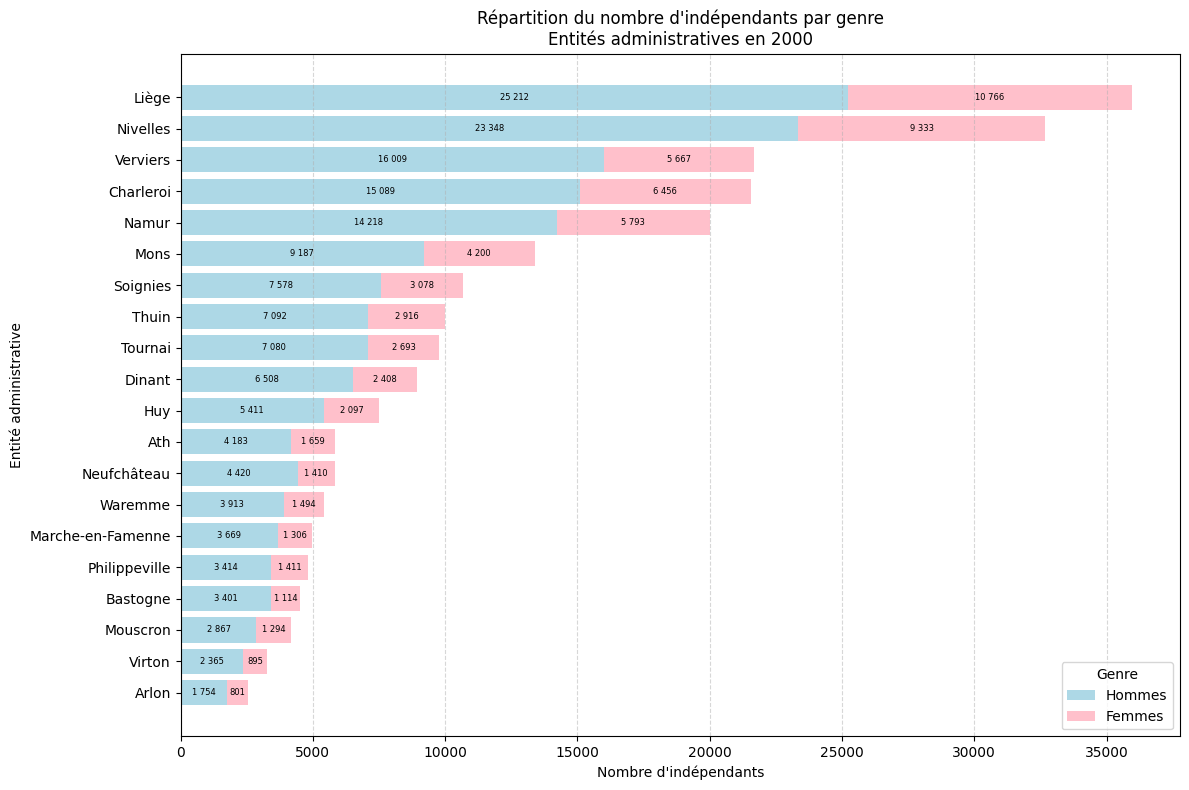

In [71]:
# Filtrer l'année 2000
df_2000 = df[df["Annee"] == 2000]

# Garder les colonnes utiles
df_2000 = df_2000[["Entité administrative", "Hommes", "Femmes"]]

# Calcul du total pour trier
df_2000["Total"] = df_2000["Hommes"] + df_2000["Femmes"]

# Trier par nombre total croissant (pour barh)
df_2000 = df_2000.sort_values("Total", ascending=True)

plt.figure(figsize=(12, 8))

bars_h = plt.barh(
    df_2000["Entité administrative"],
    df_2000["Hommes"],
    label="Hommes",
    color="lightblue"
)

bars_f = plt.barh(
    df_2000["Entité administrative"],
    df_2000["Femmes"],
    left=df_2000["Hommes"],
    label="Femmes",
    color="pink"
)

# ➕ Ajout des valeurs sur les segments
for i, row in df_2000.iterrows():
    # Hommes (au centre du segment)
    plt.text(
        row["Hommes"] / 2,
        row["Entité administrative"],
        f"{row['Hommes']:,}".replace(",", " "),
        va="center",
        ha="center",
        fontsize=6
    )

    # Femmes (au centre du segment)
    plt.text(
        row["Hommes"] + row["Femmes"] / 2,
        row["Entité administrative"],
        f"{row['Femmes']:,}".replace(",", " "),
        va="center",
        ha="center",
        fontsize=6
    )

plt.xlabel("Nombre d'indépendants")
plt.ylabel("Entité administrative")
plt.title("Répartition du nombre d'indépendants par genre\nEntités administratives en 2000")

plt.legend(title="Genre")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
